In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import warnings
warnings.filterwarnings("ignore")

In [2]:
from collections import Counter

import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.under_sampling import EditedNearestNeighbours

In [3]:
from deap import tools
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,f1_score
import pandas as pd
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import Pool, CatBoostClassifier

import joblib
import random

import lime
from lime import lime_tabular

In [6]:
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test  = pd.read_csv("X_test_FS.csv")
y_test  = pd.read_csv("y_test_FS.csv")

In [7]:
# training the model
model= LogisticRegression() 
model.fit(X_train,y_train.values.ravel())
# make predictions
y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print(f"Recall score: {recall_score(y_test,y_prediction,average = 'weighted')}")
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')

joblib.dump(model, 'models/Logistic_Regression.pkl'.format("w"), compress = 1)

Accuracy Score:  0.7341772151898734
Recall score: 0.7341772151898734
precision score:  0.7745876486382816
f1 score:  0.7489174404889131
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82        62
         1.0       0.42      0.59      0.49        17

    accuracy                           0.73        79
   macro avg       0.64      0.68      0.65        79
weighted avg       0.77      0.73      0.75        79






['models/Logistic_Regression.pkl']

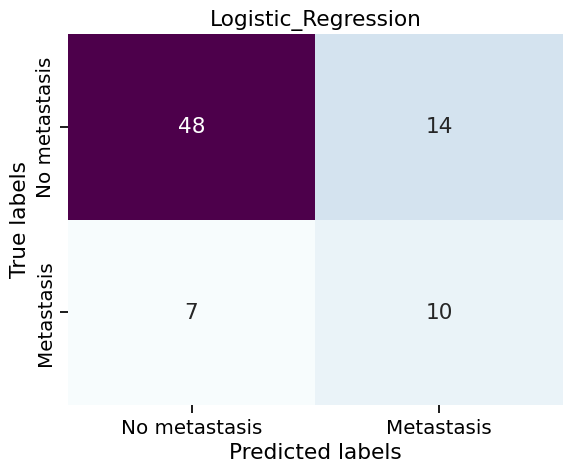

In [8]:
# Load the model
loaded_model = joblib.load(open('models/Logistic_Regression.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

# Plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(6, 5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='BuPu', cbar=False)  # Changing the colormap to 'BuPu'

ax.set_title('Logistic_Regression')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/Logistic_Regression.pdf", dpi=1200)
plt.show()


In [9]:
# train the model
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)

y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print('Recall score: ',recall_score(y_test,y_prediction,average = 'weighted'))
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')
joblib.dump(model, 'models/Decision_Tree.pkl'.format("w"), compress = 1)

Accuracy Score:  0.620253164556962
Recall score:  0.620253164556962
precision score:  0.7780590717299578
f1 score:  0.6538932028507605
              precision    recall  f1-score   support

         0.0       0.90      0.58      0.71        62
         1.0       0.33      0.76      0.46        17

    accuracy                           0.62        79
   macro avg       0.62      0.67      0.59        79
weighted avg       0.78      0.62      0.65        79






['models/Decision_Tree.pkl']

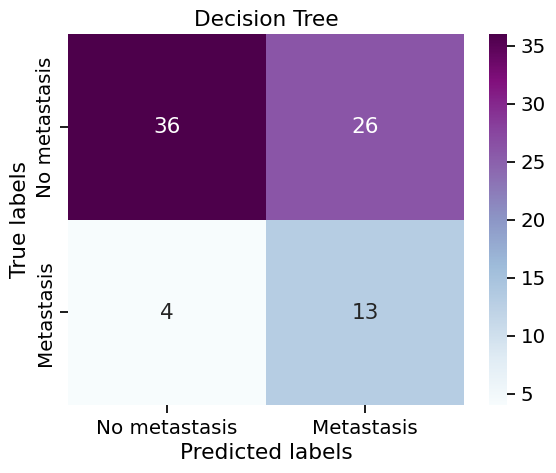

In [10]:
# load the model
loaded_model = joblib.load(open('models/Decision_Tree.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

# confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g',cmap='BuPu', cbar='False')

# labels and title 
ax.set_title('Decision Tree')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/Decision_Tree.pdf",dpi=1200)
plt.show()

In [11]:
# train the model
model = KNeighborsClassifier(n_neighbors=5, metric="hamming") 
model.fit(X_train,y_train.values.ravel())

# make predictions for test data
y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print('Recall score: ',recall_score(y_test,y_prediction,average = 'weighted'))
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')
joblib.dump(model, 'models/KNN.pkl'.format("w"), compress = 1)

Accuracy Score:  0.569620253164557
Recall score:  0.569620253164557
precision score:  0.6698992786171225
f1 score:  0.6049961641733794
              precision    recall  f1-score   support

         0.0       0.79      0.61      0.69        62
         1.0       0.23      0.41      0.29        17

    accuracy                           0.57        79
   macro avg       0.51      0.51      0.49        79
weighted avg       0.67      0.57      0.60        79






['models/KNN.pkl']

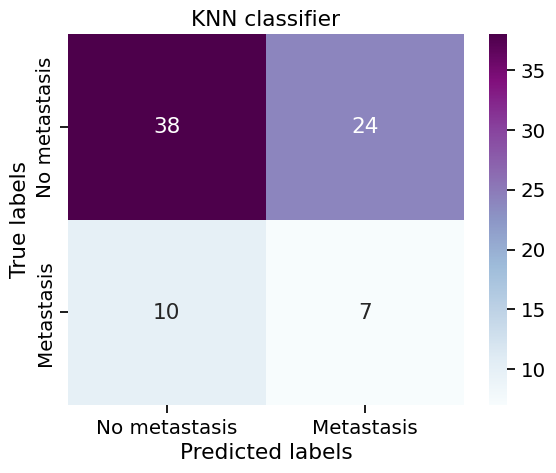

In [12]:
# load the model
loaded_model = joblib.load(open('models/KNN.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g',cmap='BuPu', cbar='False')

# labels and title
ax.set_title('KNN classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/KNN.pdf",dpi=1200)
plt.show()

In [13]:
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test  = pd.read_csv("X_test_FS.csv")
y_test  = pd.read_csv("y_test_FS.csv")

In [14]:
# fit model with training data
model = XGBClassifier()
model.fit(X_train,y_train.values.ravel())

# make predictions for test data
y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print('Recall score: ',recall_score(y_test,y_prediction,average = 'weighted'))
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')
joblib.dump(model, 'models/XGBoost.pkl'.format("w"), compress = 1)

Accuracy Score:  0.6708860759493671
Recall score:  0.6708860759493671
precision score:  0.7777555411017161
f1 score:  0.6991654946085326
              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76        62
         1.0       0.36      0.71      0.48        17

    accuracy                           0.67        79
   macro avg       0.63      0.68      0.62        79
weighted avg       0.78      0.67      0.70        79






['models/XGBoost.pkl']

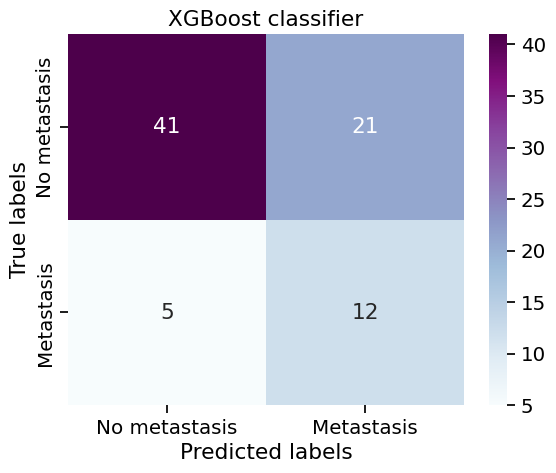

In [15]:
# load the model
loaded_model = joblib.load(open('models/XGBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g',cmap='BuPu', cbar='False')

# labels, title and ticks
ax.set_title('XGBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/XGBoost.pdf",dpi=1200)
plt.show()

In [16]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

model = lgb.LGBMClassifier() 
model.fit(X_train,y_train.values.ravel(), verbose=False)

y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print('Recall score: ',recall_score(y_test,y_prediction,average = 'weighted'))
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')
joblib.dump(model, 'models/LightGBM.pkl'.format("w"), compress = 1)

Accuracy Score:  0.6708860759493671
Recall score:  0.6708860759493671
precision score:  0.7933914187078744
f1 score:  0.6999044662049199
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.75        62
         1.0       0.37      0.76      0.50        17

    accuracy                           0.67        79
   macro avg       0.64      0.70      0.63        79
weighted avg       0.79      0.67      0.70        79






['models/LightGBM.pkl']

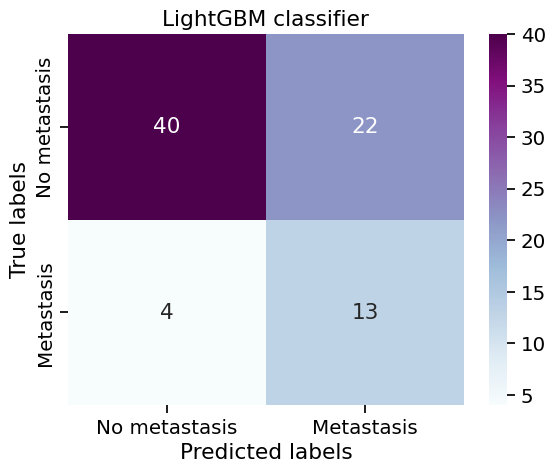

In [17]:
# load the model
loaded_model = joblib.load(open('models/LightGBM.pkl', 'rb'))
#predict results for test data
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='BuPu', cbar='False')

# labels and title
ax.set_title('LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/LightGBM.pdf",dpi=1200)
plt.show()

In [18]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)
model = CatBoostClassifier() 
model.fit(X_train, y_train.values.ravel(), cat_features=list(range(0, X_train.shape[1])), verbose=False)
y_prediction = model.predict(X_test)
# evaluate predictions
print('Accuracy Score: ',accuracy_score(y_test,y_prediction))
print('Recall score: ',recall_score(y_test,y_prediction))
print('precision score: ',precision_score(y_test,y_prediction,average = 'weighted'))
print('f1 score: ',f1_score(y_test,y_prediction,average = 'weighted'))
print(classification_report(y_test,y_prediction))
print('\n\n')
joblib.dump(model, 'models/CatBoost.pkl'.format("w"), compress = 1)

Accuracy Score:  0.6835443037974683
Recall score:  0.7058823529411765
precision score:  0.7820158901158093
f1 score:  0.71020692564565
              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77        62
         1.0       0.38      0.71      0.49        17

    accuracy                           0.68        79
   macro avg       0.63      0.69      0.63        79
weighted avg       0.78      0.68      0.71        79






['models/CatBoost.pkl']

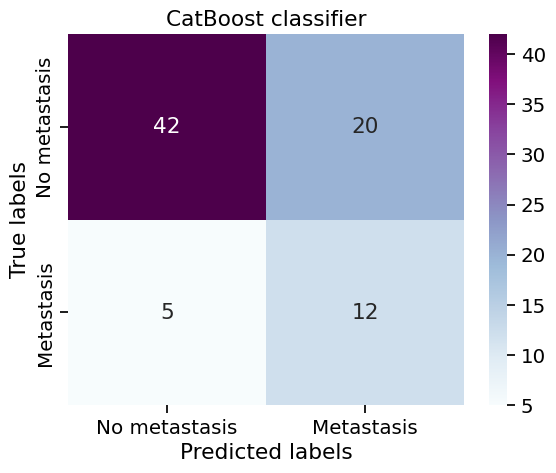

In [19]:
loaded_model = joblib.load(open('models/CatBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g',cmap='BuPu', cbar='False')

# labels, title and ticks
ax.set_title('CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()

plt.savefig("figures/CatBoost.pdf",dpi=1200)
plt.show()

In [20]:
dtrain = xgb.DMatrix(X_train, y_train)

def my_loss(y, y_hat):
    y = dtrain.get_label()
    p = y_hat
    beta=2
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))

    return grad, hess

def my_eval(beta, y, y_hat):
    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    loss_fp = (1 - y)*np.log(1.0 - p)
    print(np.sum(-(beta*loss_fn+loss_fp))/len(y))
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


xgb_params = {
        'n_jobs': -1,
        'objective': my_loss,
        'metric': my_eval,
    }

# fit model with training data
model = xgb.XGBClassifier(**xgb_params)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f"Recall score: {recall_score(y_test,y_pred)}")
print(f"precision score: {precision_score(y_test,y_pred,average = 'weighted')}")
print(f"f1 score: {f1_score(y_test,y_pred,average = 'weighted')}")
print(classification_report(y_test,y_pred))
print('\n\n')
joblib.dump(model, 'models/CS_XGBoost.pkl'.format("w"), compress = 1)    

Accuracy Score: 0.620253164556962
Recall score: 0.8235294117647058
precision score: 0.7963309013503193
f1 score: 0.6532518550851157
              precision    recall  f1-score   support

         0.0       0.92      0.56      0.70        62
         1.0       0.34      0.82      0.48        17

    accuracy                           0.62        79
   macro avg       0.63      0.69      0.59        79
weighted avg       0.80      0.62      0.65        79






['models/CS_XGBoost.pkl']

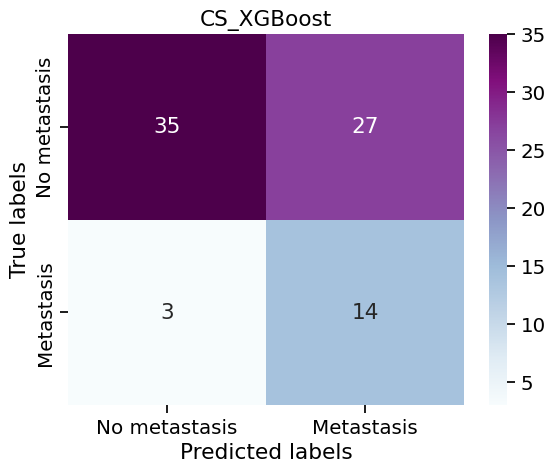

In [21]:
loaded_model = joblib.load(open('models/CS_XGBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g',cmap='BuPu', cbar='False')

# labels, title and ticks
ax.set_title('CS_XGBoost')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/CS_XGBoost.pdf",dpi=600)
plt.show()

In [22]:
beta=2

def custom_loss(y, y_hat):

    p = 1.0 / (1.0 + np.exp(-y_hat))
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))

    return grad, hess

def custom_eval(y, y_hat):

    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    loss_fp = (1 - y)*np.log(1.0 - p)
    
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


lgb_tr = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test)

# fit model with training data
model = lgb.LGBMClassifier(objective=custom_loss)
model.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric=custom_eval, verbose=0)

# make predictions for test data
predictions = model.predict(X_test)
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f"Recall score: {recall_score(y_test,y_pred)}")
print(f"precision score: {precision_score(y_test,y_pred,average = 'weighted')}")
print(f"f1 score: {f1_score(y_test,y_pred,average = 'weighted')}")
print(classification_report(y_test,y_pred))
print('\n\n')

Accuracy Score: 0.6708860759493671
Recall score: 0.8235294117647058
precision score: 0.810175455745076
f1 score: 0.7001875293014533
              precision    recall  f1-score   support

         0.0       0.93      0.63      0.75        62
         1.0       0.38      0.82      0.52        17

    accuracy                           0.67        79
   macro avg       0.65      0.73      0.63        79
weighted avg       0.81      0.67      0.70        79






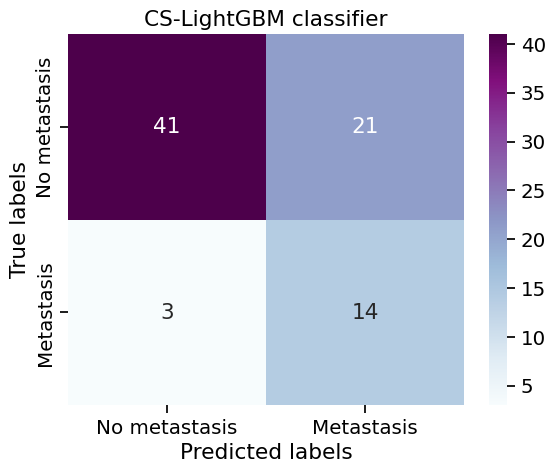

In [23]:
# load the model
loaded_model = joblib.load(open('models/CS-LightGBM.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred) 

#plot confusion matrix
plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='BuPu', cbar='False')

# labels, title and ticks
ax.set_title('CS-LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/CS-LightGBM.pdf",dpi=1200)
plt.show()

In [24]:
#custumized loss function with cost beta
class LoglossObjective(object):

    def calc_ders_range(self, approxes, targets, weights):
        beta = 2.1
        result = []

        y_true = targets
        y_pred = approxes

        for index in range(len(y_pred)):
            e = np.exp(approxes[index])
            p = e / (1 + e)
            
            der1 = (beta-1) * p * y_true[index] + p - (beta)* y_true[index]
            der2 = ((beta-1) * y_true[index] + 1) * (p * (1.0 - p))

            result.append((der1, der2))

        return result      

class LoglossMetric(object):
    def get_final_error(self, error, weight):
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        return False

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])
        
        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            e = np.exp(approx[i])
            p = e / (1 + e)
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += -w * (target[i] * np.log(p) + (1 - target[i]) * np.log(1 - p))
            return self.err_rate(approxes, target), 0 
   
    def err_rate(self, y_hat, y_true): 
        beta = 2.1
        y_pred = np.clip(y_hat, 10e-7, 1-10e-7)
        loss_fn = (beta)*y_true*np.log(y_pred)
        loss_fp = (1.0 - y_true)*np.log(1.0 - y_pred)
        return  np.sum(-(loss_fn+loss_fp))/len(y_true)

In [25]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

y_train = y_train.astype(int, copy=False)
y_test = y_test.astype(int, copy=False)

# fit model with training data
model = CatBoostClassifier(iterations=700, depth=1, bootstrap_type='Bayesian', leaf_estimation_method='Newton', loss_function=LoglossObjective(),eval_metric=LoglossMetric(), verbose=0) 
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test,y_test)])

# make predictions for test data
predictions = model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f"Recall score: {recall_score(y_test,y_pred, average = 'weighted')}")
print(f"precision score: {precision_score(y_test,y_pred, average = 'weighted')}")
print(f"f1 score: {f1_score(y_test,y_pred,average = 'weighted')}")
print(classification_report(y_test,y_pred))
print('\n\n')
joblib.dump(model, 'CS-CatBoost.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7088607594936709
Recall score: 0.7088607594936709
precision score: 0.7908034099715836
f1 score: 0.7320760027466195
              precision    recall  f1-score   support

           0       0.90      0.71      0.79        62
           1       0.40      0.71      0.51        17

    accuracy                           0.71        79
   macro avg       0.65      0.71      0.65        79
weighted avg       0.79      0.71      0.73        79






['CS-CatBoost.pkl']

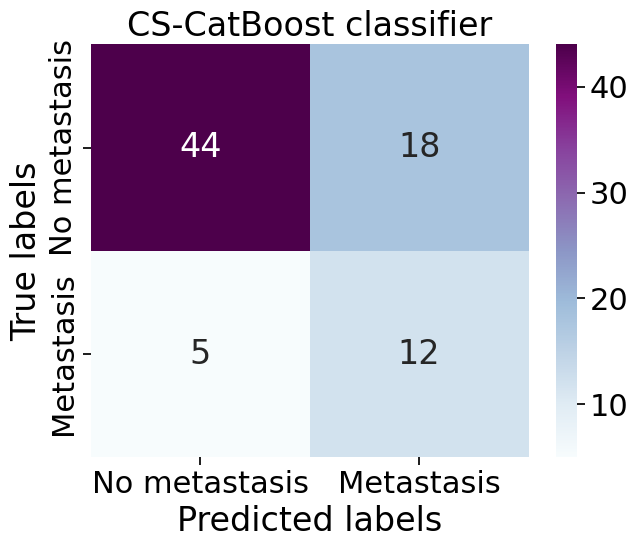

In [26]:
# load the model
loaded_model = joblib.load(open('CS-CatBoost.pkl', 'rb'))

# make predictions for test data
X_test = X_test.astype(int, copy=False)
predictions = loaded_model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]

#plot confusion matrix
sns.set_context("notebook", font_scale=2)
disp = confusion_matrix(y_test, y_pred) 

plt.figure(figsize = (7,6))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='BuPu', cbar='False')

# labels, title and ticks
ax.set_title('CS-CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()
plt.savefig("figures/CS-CatBoost.pdf",dpi=1200)
plt.show()

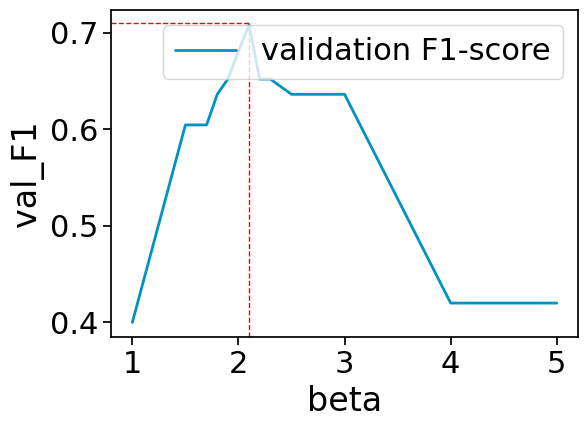

In [27]:
#we run the CS-CatBoost with different beta values and saved the loss and F1 score
beta = np.array([1,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.5,3,4,5])
val_loss = np.array([0.5829269153477675,0.578289535140304,0.5796824155202139,0.5891709467325428,0.5966460110690319,0.6083952057100382,0.6180693284303259,0.6283753125692059,0.6539834768176015,0.6716273767533728,0.6787199407279226,0.690866548931651,0.6992281833298204,0.700509245921143])
val_f1 = np.array([0.4,0.6046511627906977,0.6046511627906977,0.6046511627906977,0.6363636363636365,0.6521739130434783,0.6808510638297872,0.7083333333333334,0.6521739130434783,0.6521739130434783,0.6363636363636365,0.6363636363636365,0.41999999999999993,0.41999999999999993])

# convert to pandas dataframe
d = {'beta': beta, 'val_Logloss': val_loss, 'val_F1': val_f1}
plot_data = pd.DataFrame(d)

fig, ax1 = plt.subplots()

p = so.Plot(plot_data, x="beta")
p.add(so.Line(color="#0092C3", linewidth=2), y="val_F1").on(ax1).plot()
#p.add(so.Line(color="orange"), y="val_Logloss").on(ax2).plot()
plt.legend(labels=[ "validation F1-score"], loc ="upper right")

plt.axvline(2.1, 0,0.95, color="red", linestyle='--', linewidth=1)
plt.axhline(0.71, 0,0.3, color="red", linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig("figures/beta_choice.png", dpi=600)

In [42]:
X_train = pd.read_csv("X_train_FS.csv")
y_train = pd.read_csv("y_train_FS.csv")
X_test  = pd.read_csv("X_test_FS.csv")
y_test  = pd.read_csv("y_test_FS.csv")

X_train[X_train.columns].astype('int')
X_test[X_train.columns].astype('int')

X_train1 = X_train.to_numpy()
X_test1 = X_test.to_numpy()
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()

X_train[X_train.columns] = X_train[X_train.columns].astype('category')

# get indices of categorical features
cat_cols_ind = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(['category']).columns.tolist()]

In [43]:
categorical_names = '''0=≤40y,1=>40y
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes
zero=0,one=1,2=2 to 4,3=≥5
0=no,1=yes
0=negative,1=positive
0=negative,1=positive
0=negative,1=positive
0=T1,1=T2,2=T3,99=99
0=N0,1=N1,2=N2,3=N3
0=sarcoma,1=tubular C.,2=I C. of NST,3=C. with medullary features,4=I. papillary C.,5=I.L.C.,6=D.C. in situ,7=angiosarcoma,8=I.M.C.,9=inflammatory C.,10=metaplastic C. of NST,11=C. with neuroendocrine features,12=Mixed I. NST and special type
0=no,1=yes
0=SBR I,1=SBR II,2=SBR III
0=conservative,1=radical mastectomy
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes'''.split('\n')


#cat_names: a dict containing the values of each predictive variable in the set
cat_names={}

X_GA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
index=0
for j, names in enumerate(categorical_names):
    if X_GA[j]==1:
        values = names.split(',')
        l=[]
        for x in values:
            l.append(x.split('=')[1])
        cat_names[index] = np.array(l)
        index=index+1

In [50]:
# load the model
loaded_model = joblib.load(open('models/CS-CatBoost.pkl', 'rb'))
# make predictions for test data
X_test = X_test.astype(int, copy=False)
predictions = model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]
y_pred = pd.DataFrame(y_pred, columns= ['progression'])
#get the index of a patiens with metastatic cancer predicted to have metastasis
while True:
    idx = random.randint(1, len(X_test)) 
    if y_test.iloc[idx][0] == 1 and y_pred.iloc[idx][0]==1:
        break
print('Patient number', (idx+1))
print("Prediction : ", y_pred.iloc[idx][0])
print("Actual :     ", y_test.iloc[idx][0])

#create lime explainer object
explainer = lime_tabular.LimeTabularExplainer(X_train1, mode="classification",
                                            class_names=['No metastasis', 'Metastasis'],
                                            feature_names= ['Age', 'Nulliparity', 'Oral contraception', 'Menopause',
                                                            'Fam hist of BC', 'N° full-term preg',
                                                            'Obesity', 'ER', 'PR', 'Tumor size', 'Histo',
                                                            'Vasc. inv.', 'grade', 'Surgery',
                                                            'Adj. ChemoT', 'RadioT', 'Trastuzumab',
                                                            'HormoneT'],
                                            categorical_features = cat_cols_ind,    
                                            categorical_names = cat_names                                 
                                            )
#explain the idx th instance
exp = explainer.explain_instance(X_test.iloc[idx], 
                                 loaded_model.predict_proba, 
                                 num_features=5,
                                 distance_metric = 'hamming'
                                 )
exp.save_to_file('lime'+str(idx)+'.html')
exp.show_in_notebook()

Patient number 34
Prediction :  1.0
Actual :      1.0
